# SENTIMENT ANALYSIS ON MENTAL HEALTH DATASET 

### DENISE PRISCILA MUWANGUZI 
### M23B23/010
### B20237



In [1]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [2]:
# LOADING THE DATASET
df = pd.read_csv("Combined Data.csv", index_col=0)
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


The chosen dataset is in the domain of health, particularly mental health. 

In [3]:
df.shape

(53043, 2)

The dataset has 2 columns and 53,043 rows. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [5]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


The dataset has 7 unique statuses / sentiments. 

In [6]:
df.isnull().sum()

statement    362
status         0
dtype: int64

The statement column has 362 missing values. 

In [26]:
#Check for duplicates
df.duplicated().sum()

1588

In [28]:
duplicates_in_statement = df['statement'].duplicated(keep='first')
duplicates_in_statement

0        False
1        False
2        False
3        False
4        False
         ...  
53038     True
53039     True
53040     True
53041     True
53042     True
Name: statement, Length: 52681, dtype: bool

## DATA SOURCING 

In [7]:
# Text data from statement column 
print("Sample Texts:")
print(df['statement'].head())

Sample Texts:
0                                           oh my gosh
1    trouble sleeping, confused mind, restless hear...
2    All wrong, back off dear, forward doubt. Stay ...
3    I've shifted my focus to something else but I'...
4    I'm restless and restless, it's been a month n...
Name: statement, dtype: object


I have gotten the text data from the statement column. 

In [8]:
# Metadata / Labels 
print("Metadata (Sentiments):")
print(df['status'].value_counts())

Metadata (Sentiments):
status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


The metadata is from the status column showing the different sentiments in the dataset. 

In [9]:
# Creating a new column with cleaned / orderly text.
# Mapping the mentioned statuses to sentiments
sentiment_map = {'Normal': 'positive', 'Depression': 'negative', 'Anxiety': 'negative', 
                 'Suicidal': 'negative', 'Bipolar': 'negative', 'Stress': 'negative', 
                 'Personality disorder': 'negative'}
df['sentiment'] = df['status'].map(sentiment_map)

# Preprocessing function
def preprocess_text(text):
    text = str(text).lower()  # Convert to string + lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# CREATE cleaned_text column!
df['cleaned_text'] = df['statement'].apply(preprocess_text)

print("'cleaned_text' column created!")
print("\nSample cleaned text:")
print(df[['statement', 'cleaned_text']].head())

'cleaned_text' column created!

Sample cleaned text:
                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                        cleaned_text  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3  ive shifted focus something else im still worried  
4                im restless restless month boy mean  


In [10]:
# Getting the keywords from the dataset
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=50, stop_words='english', min_df=5)  # More features + filter rare words
X = vectorizer.fit_transform(df['cleaned_text'])
print("MENTAL HEALTH KEYWORDS (Top 50):")
print(vectorizer.get_feature_names_out())

MENTAL HEALTH KEYWORDS (Top 50):
['anxiety' 'anymore' 'bad' 'better' 'care' 'day' 'depression' 'die' 'dont'
 'end' 'family' 'feel' 'feeling' 'friend' 'fucking' 'getting' 'going'
 'good' 'got' 'hate' 'help' 'im' 'ive' 'job' 'know' 'life' 'like' 'live'
 'long' 'lot' 'love' 'make' 'month' 'need' 'people' 'person' 'really'
 'right' 'say' 'talk' 'thing' 'think' 'thought' 'time' 'try' 'want' 'way'
 'week' 'work' 'year']


## GENERATION OF RESEARCH QUESTIONS 

__QN 1.__ What is the distribution of the different sentiments in the mental health statements?
  - This is to analyse whether positive or negative sentiments dominate the dataset. It will help to reveal the real-world trends based on the dataset. 

__QN 2.__ How do mental health keywords correlate with negative sentiments? 
  -  This is to check if words like 'anxiety', or 'depression' and others reflect negative labels / sentiments.

__QN 3.__ Are there differences in text characteristics across the different sentiments?
  - This is to compare the lengths of the text to understand how people express positive and negative feelings.

__QN 4.__ Can a model be used to accurately detect the negative sentiments in mental health text? 
  - To train a  model to group statements into positive/negative, aiming for a high accuracy for apps monitoring social media for early intervention.

__QN 5.__ How does preprocessing affect model performance on mental health jargon?
  - Test if handling words like 'fucking' (vulgar emphasis in distress) or lemmatizing 'feeling'/'feel' improves classification, addressing domain-specific language.

## DATA PREPROCESSING AND EDA

In [12]:
# Handling missing data
df.dropna(inplace = True)
df.isna().sum()

statement       0
status          0
sentiment       0
cleaned_text    0
dtype: int64

I dropped the rows with missing data. This is because they cannot be imputed since it is text data. 

In [13]:
# Understanding the distribution of the different sentiments
df.status.value_counts()

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

#### USING A PIE CHART TO VISUALISE THE DISTRIBUTION OF THE DIFFERENT CONDITIONS 

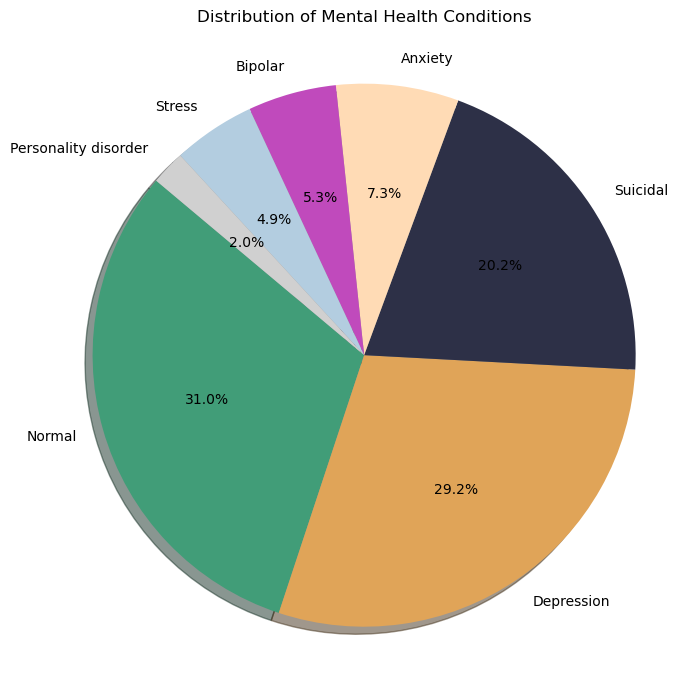

In [ ]:
# Count the occurrences of each category
status_counts = df['status'].value_counts()

# Define colors for each category (7 colors)
colors = ['#419D78', '#E0A458', '#2D3047', '#FFDBB5', '#C04ABC', '#B3CDE0', '#D0D0D0']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, shadow=True)

plt.title('Distribution of Mental Health Conditions')
plt.axis('equal')

# Display the chart
plt.tight_layout()
plt.show()

#### USING A COLUMN GRAPH TO TO VISUALISE THE DISTRIBUTION OF MENTAL HEALTH CONDITIONS

/var/folders/v1/wr18dj7j52j84pyrdc9n1pxc0000gn/T/ipykernel_55739/910454343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.values, y=status_counts.index, palette='viridis')


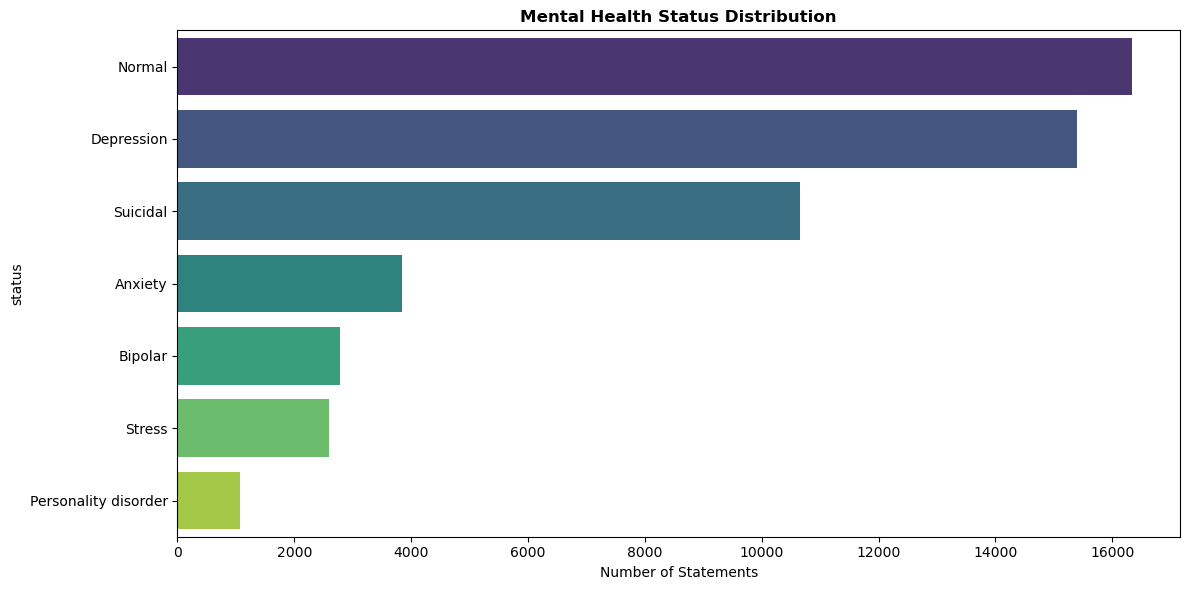

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


In [21]:
plt.figure(figsize=(12, 6))
status_counts = df['status'].value_counts()
sns.barplot(x=status_counts.values, y=status_counts.index, palette='viridis')
plt.title('Mental Health Status Distribution', fontweight='bold')
plt.xlabel('Number of Statements')
plt.tight_layout()
plt.show()
print(status_counts)

#### USING A BAR PLOT TO VISUALISE THE SENTIMENTS

/var/folders/v1/wr18dj7j52j84pyrdc9n1pxc0000gn/T/ipykernel_55739/2966481135.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


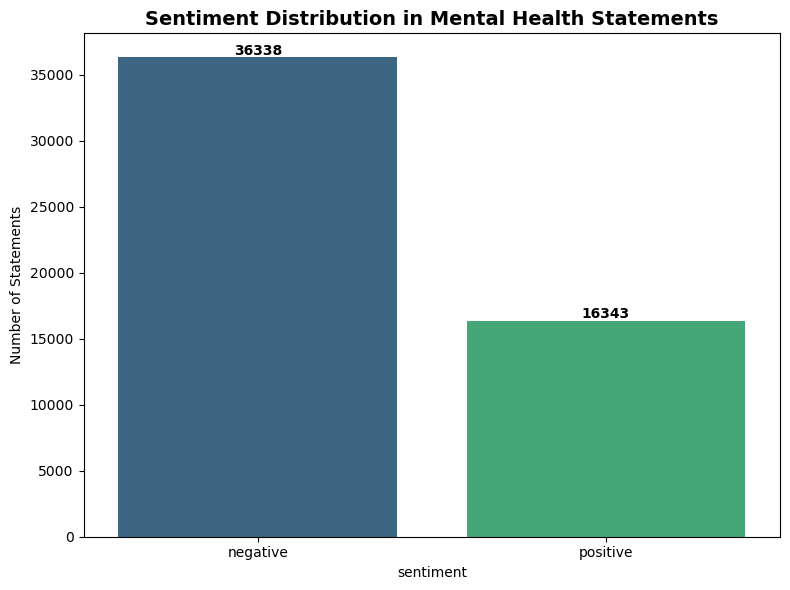

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution in Mental Health Statements', fontsize=14, fontweight='bold')
plt.ylabel('Number of Statements')
for i, v in enumerate(df['sentiment'].value_counts().values):
    plt.text(i, v+200, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

#### USING A WORD CLOUD TO VISUALISE KEYWORDS FOR DIFFERENT SENTIMENTS

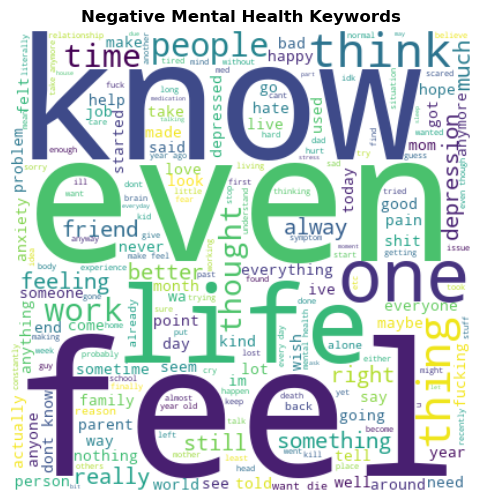

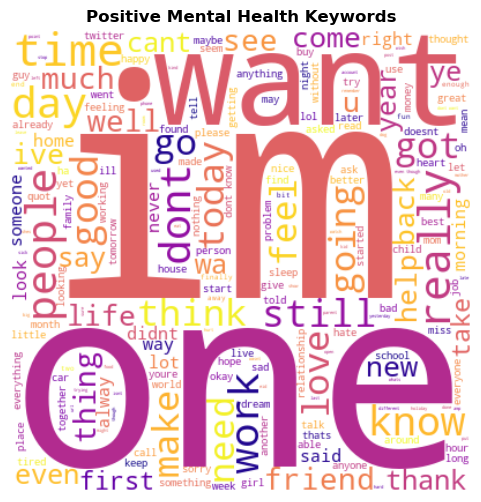

In [23]:
from wordcloud import WordCloud

def plot_wordcloud(sentiment_type):
    text = ' '.join(df[df['sentiment']==sentiment_type]['cleaned_text'])
    wordcloud = WordCloud(width=400, height=400, background_color='white', 
                         colormap='viridis' if sentiment_type=='negative' else 'plasma').generate(text)
    plt.figure(figsize=(6, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment_type.title()} Mental Health Keywords', fontweight='bold')
    plt.axis('off')
    plt.show()

plot_wordcloud('negative')
plot_wordcloud('positive')

🔑 Q2: TOP MENTAL HEALTH KEYWORDS BY SENTIMENT


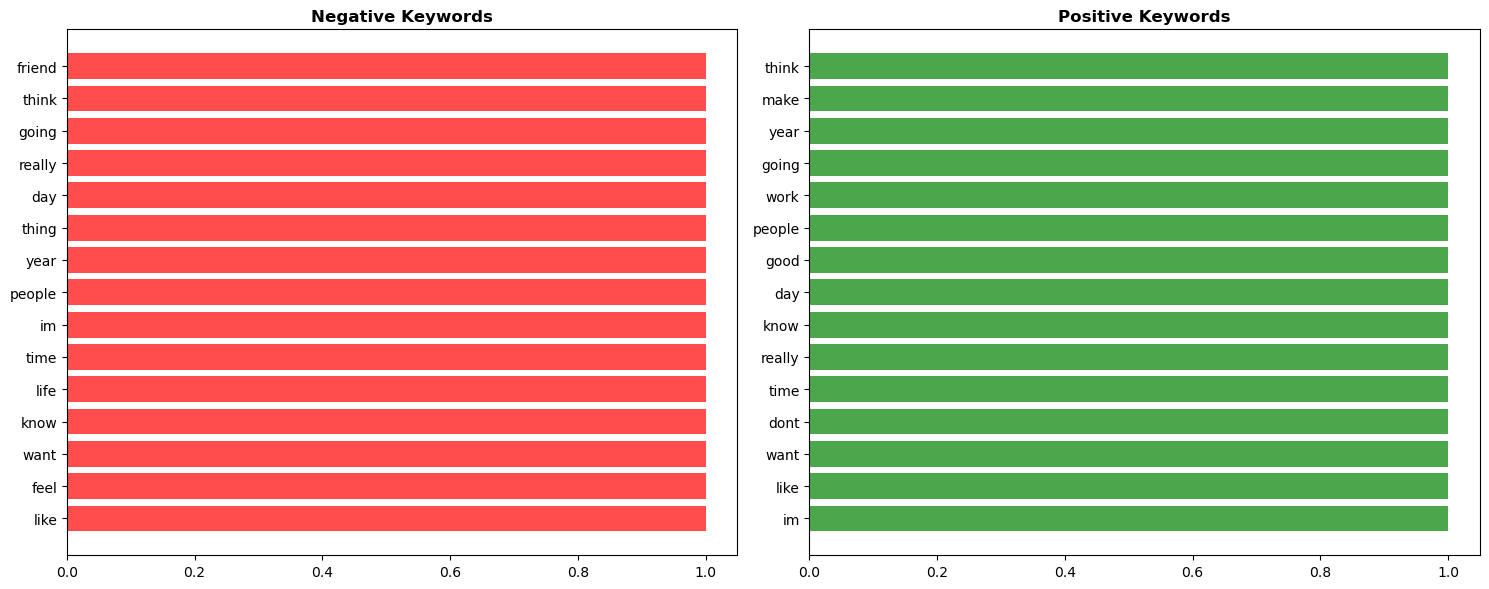

Negative: ['like', 'feel', 'want', 'know', 'life', 'time', 'im', 'people', 'year', 'thing', 'day', 'really', 'going', 'think', 'friend']
Positive: ['im', 'like', 'want', 'dont', 'time', 'really', 'know', 'day', 'good', 'people', 'work', 'going', 'year', 'make', 'think']


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

def top_keywords(sentiment, n=15):
    vectorizer = CountVectorizer(max_features=100, stop_words='english', min_df=10)
    X = vectorizer.fit_transform(df[df['sentiment']==sentiment]['cleaned_text'])
    feature_names = vectorizer.get_feature_names_out()
    word_counts = X.sum(axis=0).A1
    top_idx = word_counts.argsort()[-n:][::-1]
    return [feature_names[i] for i in top_idx]

print("🔑 Q2: TOP MENTAL HEALTH KEYWORDS BY SENTIMENT")
neg_keywords = top_keywords('negative', 15)
pos_keywords = top_keywords('positive', 15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.barh(neg_keywords, [neg_keywords.count(w) for w in neg_keywords], color='red', alpha=0.7)
ax1.set_title('Negative Keywords', fontweight='bold')
ax2.barh(pos_keywords, [pos_keywords.count(w) for w in pos_keywords], color='green', alpha=0.7)
ax2.set_title('Positive Keywords', fontweight='bold')
plt.tight_layout()
plt.show()

print("Negative:", neg_keywords)
print("Positive:", pos_keywords)

#### USING A BOXPLOT TO VISUALISE THE LENGTH OF TEXT BY SENTIMENT

/var/folders/v1/wr18dj7j52j84pyrdc9n1pxc0000gn/T/ipykernel_55739/2279940157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='text_length', palette='viridis')


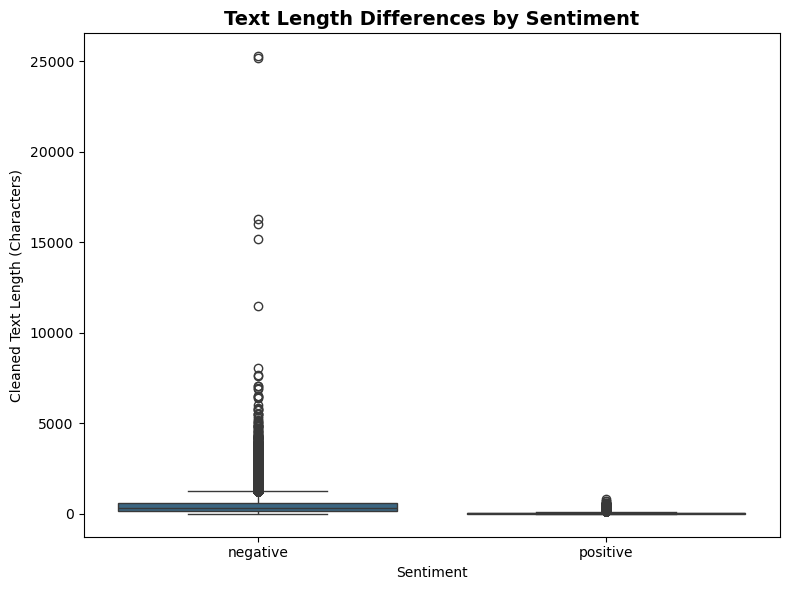

Avg length - Negative: 463.5
Avg length - Positive: 55.9


In [24]:
# Add text length
df['text_length'] = df['cleaned_text'].apply(len)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sentiment', y='text_length', palette='viridis')
plt.title('Text Length Differences by Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Cleaned Text Length (Characters)')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()

print(f"Avg length - Negative: {df[df['sentiment']=='negative']['text_length'].mean():.1f}")
print(f"Avg length - Positive: {df[df['sentiment']=='positive']['text_length'].mean():.1f}")

## SENTIMENT CLASSIFICATION 

#### SPLIT DATA & PREPARE FEATURES

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# 1. Split data (80% train, 20% test)
X = df['cleaned_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"✅ DATA SPLIT:")
print(f"Training: {len(X_train)} texts | Test: {len(X_test)} texts")
print(f"Train balance: {y_train.value_counts(normalize=True).round(2)}")

✅ DATA SPLIT:
Training: 42144 texts | Test: 10537 texts
Train balance: sentiment
negative    0.69
positive    0.31
Name: proportion, dtype: float64


BUILD & TRAIN MODEL 

In [30]:
# 2. Create PIPELINE (Auto: Clean → Features → Model)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# 3. TRAIN MODEL (30 seconds!)
print("🚀 TRAINING MODEL...")
pipeline.fit(X_train, y_train)
print("✅ MODEL TRAINED!")

# 4. PREDICT on test set
y_pred = pipeline.predict(X_test)

🚀 TRAINING MODEL...
✅ MODEL TRAINED!


In [31]:
# Test on YOUR sample texts
sample_texts = [
    "trouble sleeping confused mind restless heart",  # Should be NEGATIVE
    "oh my gosh",                                     # Should be NEGATIVE  
    "therapy really helping feel better"              # Should be POSITIVE
]

sample_preds = pipeline.predict(sample_texts)
sample_probs = pipeline.predict_proba(sample_texts)

print("🧪 MODEL TEST:")
for text, pred, prob in zip(sample_texts, sample_preds, sample_probs):
    print(f"Text: '{text}' → Predicted: {pred} (Confidence: {max(prob):.1%})")

🧪 MODEL TEST:
Text: 'trouble sleeping confused mind restless heart' → Predicted: negative (Confidence: 92.7%)
Text: 'oh my gosh' → Predicted: positive (Confidence: 98.5%)
Text: 'therapy really helping feel better' → Predicted: negative (Confidence: 63.2%)


VISUAL PROOF (CONFUSION MATRIX)

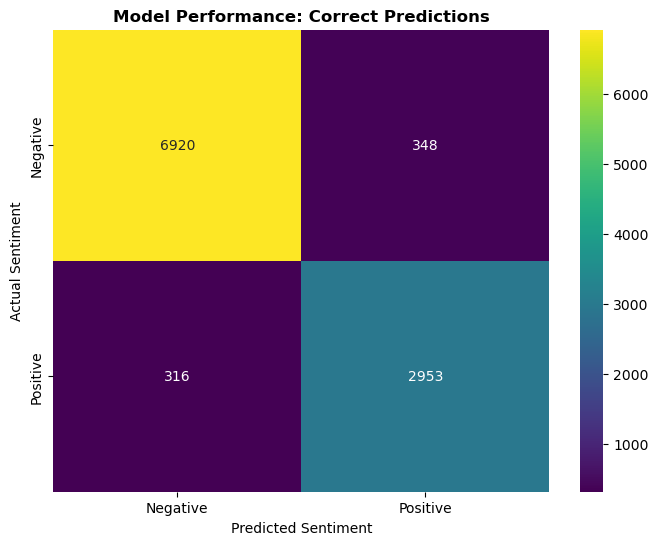

📊 DETAILED RESULTS:
              precision    recall  f1-score   support

    negative       0.96      0.95      0.95      7268
    positive       0.89      0.90      0.90      3269

    accuracy                           0.94     10537
   macro avg       0.93      0.93      0.93     10537
weighted avg       0.94      0.94      0.94     10537



In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Model Performance: Correct Predictions', fontweight='bold')
plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiment')
plt.show()

# Classification Report
print("📊 DETAILED RESULTS:")
print(classification_report(y_test, y_pred))